In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [3]:
y = 'price'
num_columns = ['yr_built','yr_renovated','sqft_living','sqft_lot','waterfront','view','condition','grade']

In [4]:
df2 = df[num_columns]

In [7]:
final_df = pd.get_dummies(df2, columns=['view','grade','condition'], dtype=int)

In [8]:
final_df

,yr_built,yr_renovated,sqft_living,sqft_lot,waterfront,view_0,view_1,view_2,view_3,view_4,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,1955,0,1180,5650,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1951,1991,2570,7242,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1933,0,770,10000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1965,0,1960,5000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1987,0,1680,8080,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2009,0,1530,1131,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21609,2014,0,2310,5813,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21610,2009,0,1020,1350,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21611,2004,0,1600,2388,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
Y = df['price']
X = final_df

In [10]:
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1860.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:16:46   Log-Likelihood:            -2.9549e+05
No. Observations:               21613   AIC:                         5.910e+05
Df Residuals:                   21588   BIC:                         5.912e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr_built     -2605.1135     63.531    -41.005   

In [11]:
predictions = model.predict(X)

In [12]:
residuals = predictions - df['price']

In [13]:
residuals

0        114867.170409
1         65204.220065
2         66597.802731
3       -118638.764190
4        -78842.839069
             ...      
21608     -5667.086476
21609     51824.775774
21610   -227718.617732
21611    -22964.237195
21612   -147933.610424
Length: 21613, dtype: float64

Text(0, 0.5, 'Residuals')

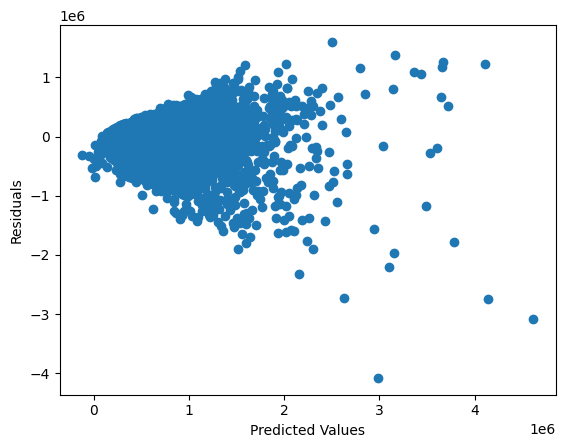

In [14]:
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

<Axes: ylabel='Count'>

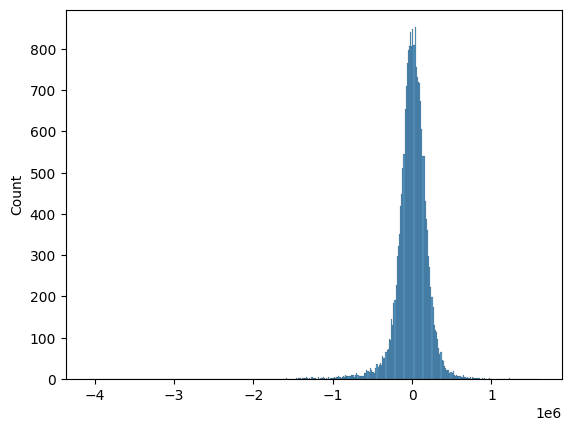

In [15]:
sns.histplot(residuals)

KeyboardInterrupt: 

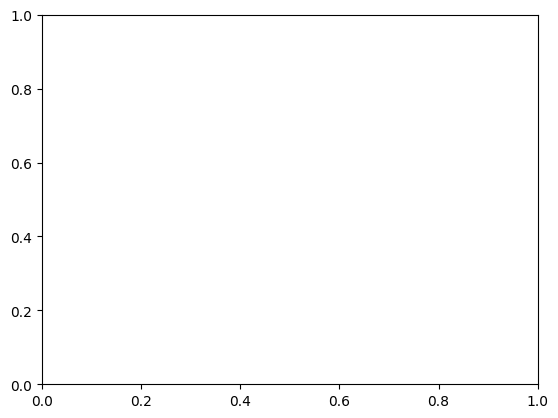

In [16]:
sm.graphics.influence_plot(model, criterion = 'cooks')

In [17]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

n_observations = len(Y)
n_predictors = X.shape[1]

threshold = 4 / (n_observations - n_predictors - 1) # cooks distance threshold to use for influential points

In [20]:
threshold

0.0001853138753764188

In [21]:
high_influence_points = np.where(cooks_d > threshold)[0]

In [23]:
len(high_influence_points)

1197

In [24]:
new_df = pd.concat([final_df, df['price']],axis=1)

In [27]:
filtered_df = new_df.drop(new_df.index[high_influence_points])

In [30]:
Y = filtered_df['price']
X = filtered_df.drop(['price','grade_13'], axis=1)

In [31]:
model2 = sm.OLS(Y,X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1917.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:48:32   Log-Likelihood:            -2.7115e+05
No. Observations:               20416   AIC:                         5.423e+05
Df Residuals:                   20394   BIC:                         5.425e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr_built     -2366.4674     44.309    -53.409   

In [32]:
predictions2 = model2.predict(X)

In [33]:
residuals2 = predictions2 - Y

<Axes: >

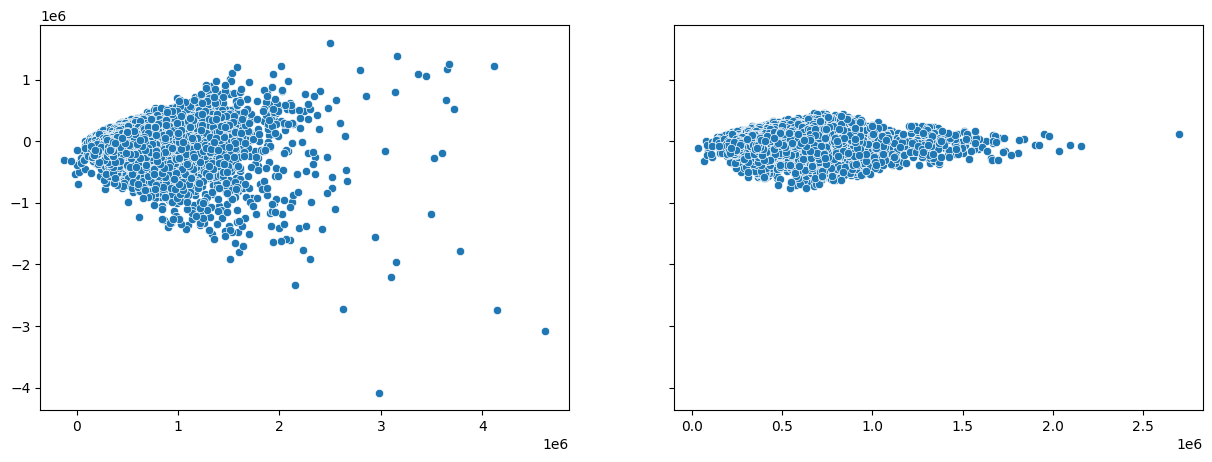

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
sns.scatterplot(x=predictions, y=residuals, ax=ax1)
sns.scatterplot(x=predictions2, y=residuals2, ax=ax2)

In [39]:
np.sqrt(mean_squared_error(predictions2, Y))

141790.1257207715

In [40]:
np.sqrt(mean_squared_error(predictions, df['price']))

209615.40277071125

In [41]:
filtered_df['price'].mean()

493502.4948079937

In [43]:
141790/493502

0.2873139318584322

In [42]:
df['price'].mean()

540088.1417665294

In [44]:
209615/540088


0.3881126779339663

### Classification & Sklearn

- Step 1: Identify X, Y
- Step 2: Split your data into TRAINING & TESTING data 
- Step 3: Measure RMSE

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [50]:
X

,yr_built,yr_renovated,sqft_living,sqft_lot,waterfront,view_0,view_1,view_2,view_3,view_4,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_1,condition_2,condition_3,condition_4,condition_5
0,1955,0,1180,5650,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1951,1991,2570,7242,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1933,0,770,10000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1965,0,1960,5000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1987,0,1680,8080,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2009,0,1530,1131,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21609,2014,0,2310,5813,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21610,2009,0,1020,1350,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21611,2004,0,1600,2388,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [51]:
X_train

,yr_built,yr_renovated,sqft_living,sqft_lot,waterfront,view_0,view_1,view_2,view_3,view_4,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_1,condition_2,condition_3,condition_4,condition_5
12590,1923,0,1740,3600,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19722,2015,0,2580,2875,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6450,1985,0,1610,5159,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6122,1947,0,1370,8100,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2324,1954,0,1700,10642,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1985,0,2280,10255,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17982,1962,0,1200,4800,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10192,1952,0,1750,5400,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9581,1983,0,1660,2415,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
X_test

,yr_built,yr_renovated,sqft_living,sqft_lot,waterfront,view_0,view_1,view_2,view_3,view_4,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_1,condition_2,condition_3,condition_4,condition_5
3572,1996,0,2070,54557,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6600,1956,0,2120,7420,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1365,1979,0,1960,9300,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4595,1966,0,1260,6500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11736,1993,0,1850,8820,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,1990,0,2480,7428,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
20685,2007,0,4140,46173,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
18893,1956,0,1750,5750,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2825,1967,0,3760,12978,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [53]:
model3 = LinearRegression().fit(X_train, Y_train)

In [54]:
model3.coef_

array([-2.40627234e+03,  1.62783136e+01,  1.06901479e+02, -2.13281638e-01,
        4.93176347e+05, -1.09396007e+05, -1.57489831e+04, -5.36550187e+04,
       -7.20838827e+03,  1.86008397e+05,  6.23986125e-08,  5.41331246e-08,
       -3.88314064e+05, -4.34235352e+05, -3.71348750e+05, -2.69696629e+05,
       -1.52997148e+05, -9.36141462e+03,  1.39493204e+05,  4.77274470e+05,
        1.00918568e+06, -2.35743349e+04, -4.90210629e+04,  8.80009756e+03,
        9.94141737e+03,  5.38538829e+04])

In [59]:
pred = model3.predict(X_test)

In [60]:
pred

array([462647.10835411, 458738.371347  , 429801.36697803, ...,
       519194.45831231, 865596.2766705 , 185614.17221549])

In [61]:
Y_test

3572     770000.0
6600     453000.0
1365     372000.0
4595     390000.0
11736    303000.0
           ...   
10807    729000.0
20685    810000.0
18893    575000.0
2825     838300.0
19234    200000.0
Name: price, Length: 4084, dtype: float64

In [62]:
np.sqrt(mean_squared_error(pred, Y_test))

142158.13385807362

In [63]:
X_test

,yr_built,yr_renovated,sqft_living,sqft_lot,waterfront,view_0,view_1,view_2,view_3,view_4,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_1,condition_2,condition_3,condition_4,condition_5
3572,1996,0,2070,54557,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6600,1956,0,2120,7420,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1365,1979,0,1960,9300,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4595,1966,0,1260,6500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11736,1993,0,1850,8820,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,1990,0,2480,7428,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
20685,2007,0,4140,46173,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
18893,1956,0,1750,5750,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2825,1967,0,3760,12978,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [65]:
pred

array([462647.10835411, 458738.371347  , 429801.36697803, ...,
       519194.45831231, 865596.2766705 , 185614.17221549])

In [68]:
Y_test

3572     770000.0
6600     453000.0
1365     372000.0
4595     390000.0
11736    303000.0
           ...   
10807    729000.0
20685    810000.0
18893    575000.0
2825     838300.0
19234    200000.0
Name: price, Length: 4084, dtype: float64

In [70]:
from sklearn.datasets import load_iris

In [71]:
data = load_iris()

In [75]:
df = pd.DataFrame(np.c_[data.data, data.target], columns=['sepal_length','sepal_width','petal_length','petal_width', 'target'])

In [76]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


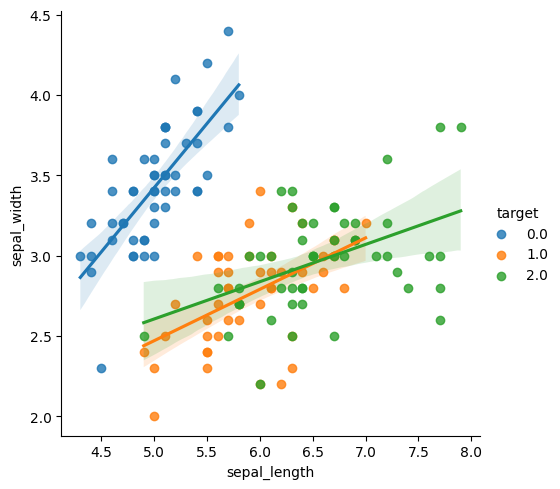

In [77]:
sns.lmplot(data=df, x='sepal_length',y='sepal_width', hue='target')

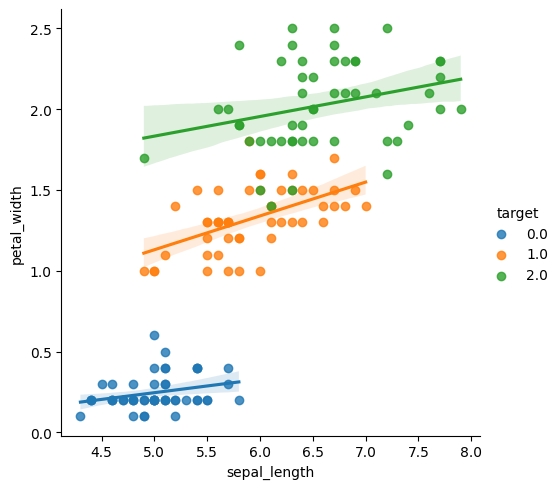

In [78]:
sns.lmplot(data=df, x='sepal_length',y='petal_width', hue='target')

In [79]:
Y = df['target']
X = df.drop('target', axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [81]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.9777777777777777

In [84]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
5,5.4,3.9,1.7,0.4
34,4.9,3.1,1.5,0.2
67,5.8,2.7,4.1,1.0
125,7.2,3.2,6.0,1.8
37,4.9,3.6,1.4,0.1


In [82]:
pred

array([0., 0., 1., 2., 0., 2., 1., 1., 0., 2., 1., 2., 2., 2., 0., 1., 2.,
       1., 2., 0., 0., 1., 0., 0., 2., 0., 0., 1., 1., 1., 1., 2., 1., 1.,
       0., 0., 1., 0., 0., 2., 2., 0., 2., 2., 2.])

In [83]:
y_test

5      0.0
34     0.0
67     1.0
125    2.0
37     0.0
145    2.0
56     1.0
90     1.0
12     0.0
103    2.0
64     1.0
117    2.0
149    2.0
116    2.0
1      0.0
79     1.0
131    2.0
70     1.0
114    2.0
36     0.0
6      0.0
68     1.0
25     0.0
7      0.0
128    2.0
27     0.0
15     0.0
65     1.0
73     1.0
81     1.0
66     1.0
146    2.0
74     1.0
69     1.0
24     0.0
13     0.0
92     1.0
17     0.0
41     0.0
118    2.0
72     1.0
3      0.0
108    2.0
120    2.0
126    2.0
Name: target, dtype: float64